# Who is commenting on NYT articles?

I'm using Kaggle's New York Times comment dataset: https://www.kaggle.com/aashita/nyt-comments. I'm not focusing on the content of the comments, I simply want to investigate some basic numerical facts about article comments. I chose to limit the the date range to Jan-April 2017 because that was the largest contiguous dataset available.

Some questions I wanted to answer:

- How many comments were posted on the NYT website?
- What is the distribution of comments per article?
- What is the distribution of comments per commenter? 

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## Loading and concatenating the comment datasets

In [2]:
comment_files = ['./input/CommentsJan2017.csv', './input/CommentsFeb2017.csv', './input/CommentsMarch2017.csv', './input/CommentsApril2017.csv']
df_list = [pd.read_csv(file) for file in comment_files]
df = pd.concat(df_list)

c:\users\marcus\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
c:\users\marcus\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
c:\users\marcus\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Cleaning

Some basic cleaning of the data, I drop columns I'm not using and set the index of each row to the parsed createDate field. 

There seem to be some comments in the dataset that are outside the date range I was looking at, so I also remove those.

In [3]:
# set index to timestamp
df.index = pd.to_datetime(df['createDate'], unit='s')
# dropping columns I'm not going to use
df = df.drop(columns=[
    'approveDate', 
    'commentBody', 
    'commentSequence', 
    'commentTitle', 
    'commentType', 
    'depth', 
    'editorsSelection', 
    'inReplyTo', 
    'newDesk', 
    'parentID', 
    'parentUserDisplayName', 
    'permID', 
    'picURL', 
    'printPage', 
    'recommendations', 
    'recommendedFlag', 
    'replyCount', 
    'reportAbuseFlag', 
    'sectionName', 
    'sharing', 
    'status', 
    'timespeople', 
    'trusted', 
    'typeOfMaterial', 
    'updateDate', 
    'userDisplayName', 
    'userTitle', 
    'userURL'])
# removing comments not within the specified date range
df = df.loc['2017-1-3':'2017-4-30']

## Resample data by day and month


In [4]:
count_data = np.ones(len(df.index))
comment_count = pd.DataFrame(index=df.index, data={'comments': count_data})

comment_count_per_day = comment_count.resample('D', convention='end').sum()
comment_count_per_month = comment_count.resample('M', convention='end').sum()

## Analysis: How many comments are being posted on the NYT website?

There were a total of 948699 comments posted beween January and April, on average ~8000 comments per day. There were 16 peaks in comments over the 4 months measured - indicating a rough weekly cycle. 

948699
           comments
count    118.000000
mean    8039.822034
std     2486.665885
min     3447.000000
25%     6118.250000
50%     8058.500000
75%     9256.250000
max    20027.000000


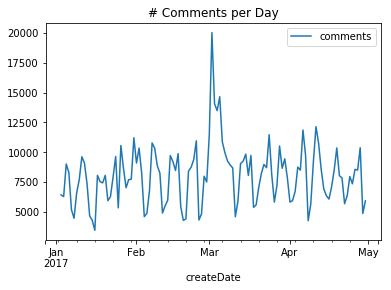

In [5]:
print(len(df.index))
print(comment_count_per_day.describe())
comment_count_per_day.plot(title="# Comments per Day")

Tuesday through Friday were much more active than Saturday through Monday. 

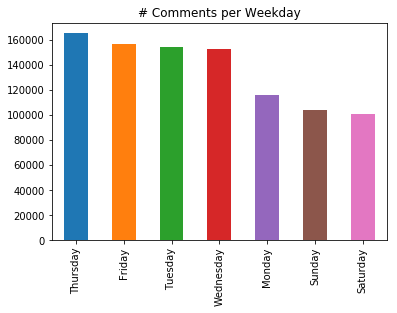

In [6]:
df['day_of_week'] = df.index.weekday_name
df['day_of_week'].value_counts().plot(kind='bar', title="# Comments per Weekday")

March had the most comments posted over the month, coming in at almost 300k. This is related to the top number (20,027) of comments posted on March 2nd, followed by March 5th, 3rd, and 4th signifying very high activity during that period. The rest of the month seemed to follow the regular trend.

createDate
2017-03-02    20027.0
2017-03-05    14653.0
2017-03-03    14061.0
2017-03-04    13485.0
2017-04-11    12143.0
2017-04-06    11857.0
2017-03-01    11514.0
2017-03-24    11464.0
2017-01-31    11213.0
2017-02-24    10954.0
Name: comments, dtype: float64


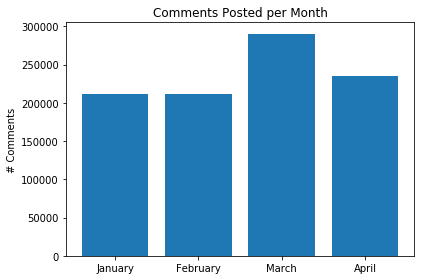

In [7]:
print(comment_count_per_day['comments'].sort_values(ascending=False).head(10))


plt.bar(
    ('January', 'February', 'March', 'April'), 
    comment_count_per_month['comments'], 
    0.8,
    align='center')
plt.ylabel('# Comments')
plt.title('Comments Posted per Month')
plt.tight_layout()
plt.show()


## Analysis: What is the distribution of comments per article?

On average articles receive ~270 comments, however there is high variance with a standard deviation of ~462. 

The majority of articles receive very few (< 100) comments, however there are some articles that receive thousands. 

count    3516.000000
mean      269.823379
std       461.931879
min         1.000000
25%        21.000000
50%        80.000000
75%       347.250000
max      6024.000000
Name: articleID, dtype: float64


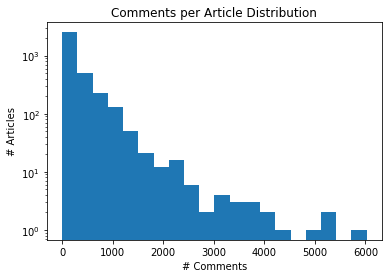

In [8]:
print(df['articleID'].value_counts().describe())

plt.hist(df['articleID'].value_counts(), 20, log=True)
plt.xlabel('# Comments')
plt.ylabel('# Articles')
plt.title('Comments per Article Distribution')

plt.show()

## Analysis: What is the distribution of comments per commenter? 

There are 138,978 unique commenters based on userID. The mean comments a unique commenter will have is ~7 comments - though over 50% of commenters have only one comment. The highest commenter has 3204 comments!


count    138978.000000
mean          6.826253
std          29.758817
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        3204.000000
Name: userID, dtype: float64


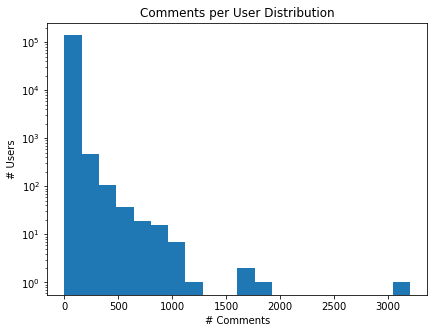

In [9]:
print(df['userID'].value_counts().describe())

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(df['userID'].value_counts(), 20, log=True)
plt.xlabel('# Comments')
plt.ylabel('# Users')
plt.title('Comments per User Distribution')

plt.show()